# Discussion 9 - Linear Regression

## The Basics

Concept: Linear regression models the relationship between dependent (Y) and independent (X) variables using a linear equation.

Equation: $Y = \beta_0 + \beta_1X + \epsilon$, where $\epsilon$ is the error term.

Objective: Minimize the error to find the best-fitting line.

Intercept: 137438.17207228267
Coefficient: 140.26349194244852


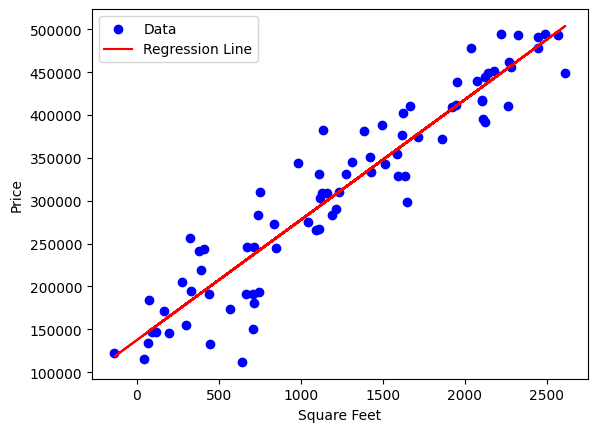

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data - house square feet and prices
data = {'sqft': np.linspace(0, 2500, 100) + np.random.normal(0, 200, size=100),
        'price': np.linspace(120000, 500000, 100) + np.random.normal(0, 20000, size=100)}
df = pd.DataFrame(data)

train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Model
X = train[['sqft']]
y = train['price']
model = LinearRegression()
model.fit(X, y)

# Output coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Square Feet')
plt.ylabel('Price')
# mark the intercept on the y axis
# plt.plot(0, model.intercept_, 'go', label='Intercept')
plt.legend()
plt.show()


## Assumptions

When running Linear Regression on data, we make the following assumptions: 

1) Linearity
2) Independence
3) Homescedasticity

How do each of these impact the model's predictive ability? 

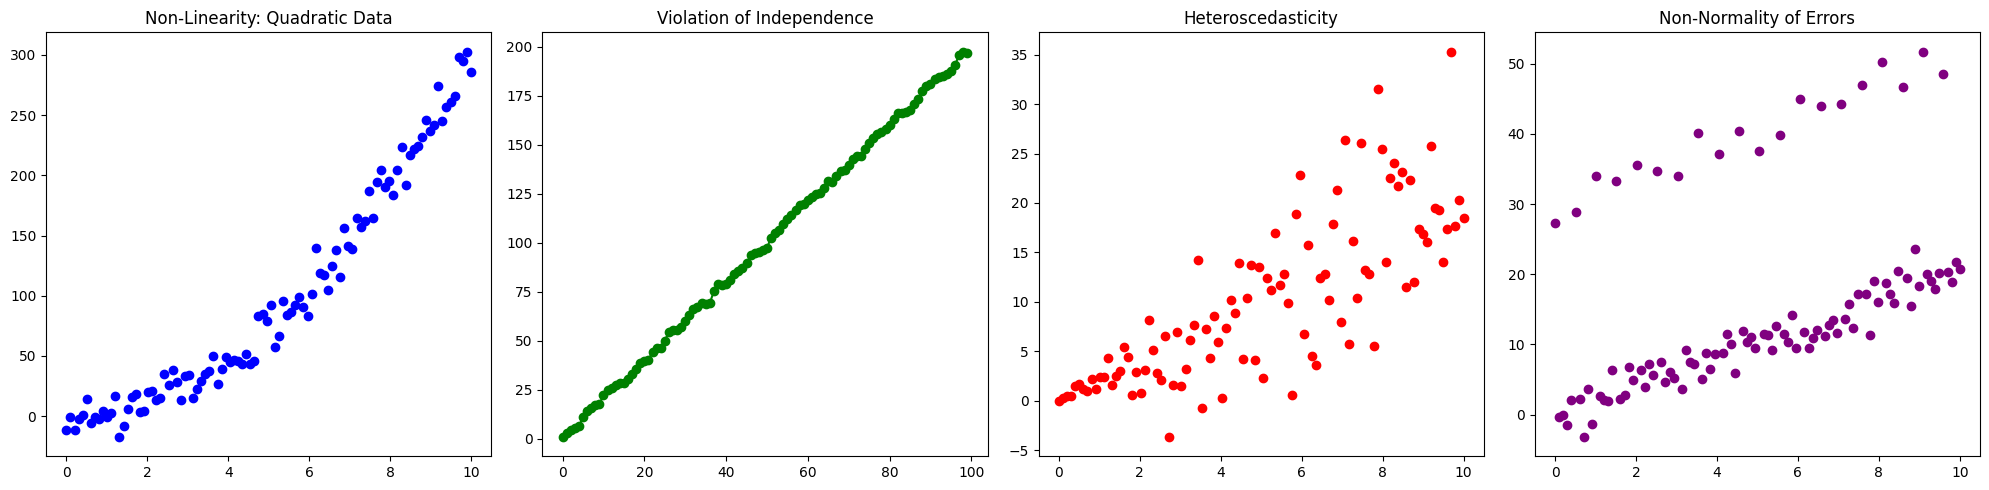

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Non-Linearity: Quadratic data
X1 = np.linspace(0, 10, 100)
# Quadratic relationship
y1 = 3 * X1**2 + np.random.normal(0, 10, size=X1.shape)

# 2. Violation of Independence: Autocorrelated data
X2 = np.arange(100)
errors = np.random.normal(0, 1, size=X2.shape)
y2 = 2 * X2 + errors
y2[1:] += errors[:-1]  # Introducing autocorrelation

# 3. Heteroscedasticity: Increasing variance
X3 = np.linspace(0, 10, 100)
# Variance increases with X
y3 = 2 * X3 + np.random.normal(0, X3, size=X3.shape)

# 4. Non-Normality of Errors: Outliers
X4 = np.linspace(0, 10, 100)
y4 = 2 * X4 + np.random.normal(0, 1, size=X4.shape) * 2
y4[::5] += 30  # Introduce large outliers

# Create the subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot for Non-Linearity
axs[0].scatter(X1, y1, color='blue')
axs[0].set_title("Non-Linearity: Quadratic Data")

# Plot for Violation of Independence
axs[1].plot(X2, y2, 'o-', color='green')
axs[1].set_title("Violation of Independence")

# Plot for Heteroscedasticity
axs[2].scatter(X3, y3, color='red')
axs[2].set_title("Heteroscedasticity")

# Plot for Non-Normality of Errors
axs[3].scatter(X4, y4, color='purple')
axs[3].set_title("Non-Normality of Errors")

plt.tight_layout()
plt.show()

## Evaluating the model

In [67]:
# Revisit the model we created earlier. 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = model.predict(test[['sqft']])
y_test = test['price']
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

r_squared = model.score(X, y)
print(f"R²: {r_squared}")

MAE: 26265.07549457642
MAPE: 0.09634573631994635
R²: 0.8922698584772721


What does the $R^2$ value mean? How does one intepret it? 

## Checking for our assumptions

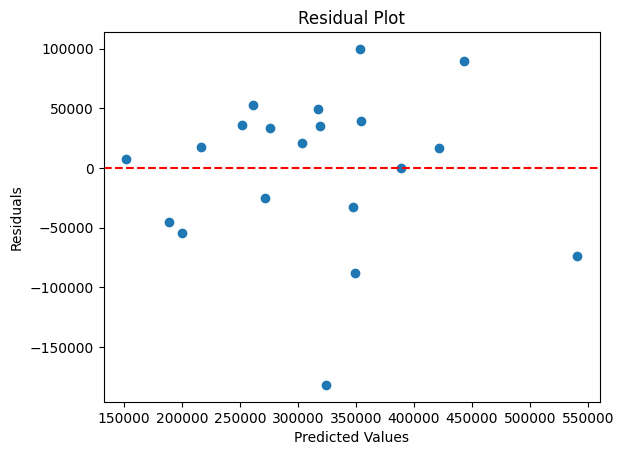

In [37]:
import matplotlib.pyplot as plt

# Predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Cross-validation

Cross-validation is a technique used to evaluate the predictive performance of a model. It is a resampling procedure used to evaluate a model if we have a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. 


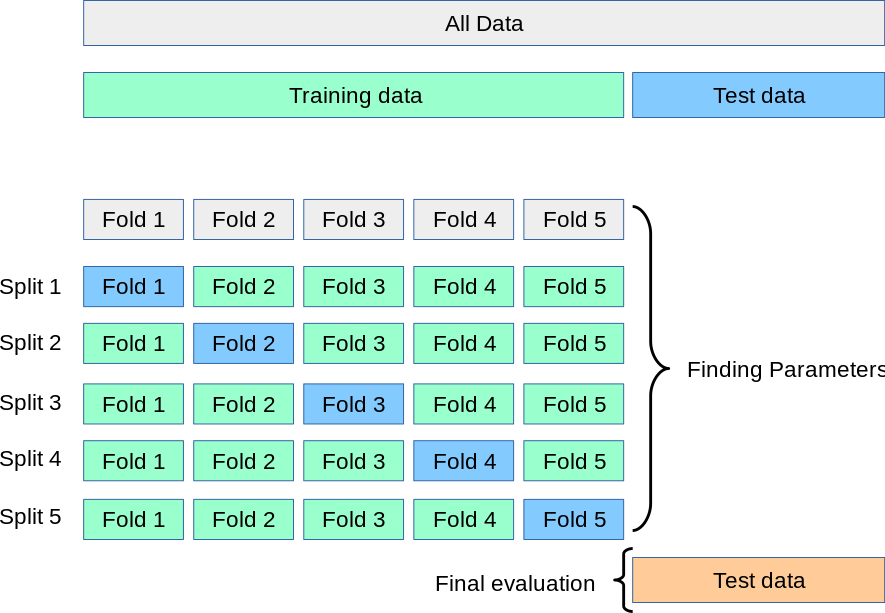

In [70]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

Cross-validation scores: [0.84887753 0.8904986  0.83787769 0.93040017 0.8119232 ]
Mean CV score: 0.8639154365165329
